In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from helpers import show_labeled_image, print_tree
from pathlib import Path

In [2]:
WBC = {
    "Basophile": [],
    "Eosinophile": [],
    "Lymphoblast": [],
    "Lymphocyte": [],
    "Monocyte": [],
    "Myeloblast": [],
    "Neutrophile Band": [],
    "Neutrophile Segment": [],
    "Normoblast": []
}
IMAGES_PATH = r"D:\master_thesis_wd\datasets\dataset3\images"
LABELS_PATH = r"D:\master_thesis_wd\datasets\dataset3\predicted_yolo_labels"

In [3]:
img_list = os.listdir(IMAGES_PATH)
for img in img_list:
    img_class = img.split("_")[0]
    WBC[img_class].append(img)

In [4]:
limited_WBC = {k: v[:300] for k, v in WBC.items()}

In [5]:
LABEL_MAP = {
    "0": "Basophile",
    "1": "Eosinophile",
    "2": "Lymphoblast",
    "3": "Lymphocyte",
    "4": "Monocyte",
    "5": "Myeloblast",
    "6": "Neutrophile Band",
    "7": "Neutrophile Segment",
    "8": "Normoblast",
}

In [6]:
class App(widgets.HBox):
    def __init__(self, wbc, imgs_path, labels_path, label_map):
        super().__init__()
        # init
        self.wbc = wbc
        self.dataset_len = self.get_dataset_len()
        self.i = 0
        self.imgs_path = imgs_path
        self.labels_path = labels_path
        self.label_map = label_map
        self.classes_iter = iter(self.get_classes())
        self.curr_class = self.get_curr_class()
        self.img_iter = iter(self.wbc[self.curr_class])
        self.accepted_wbc = {key: [] for key in self.wbc}
        
        # panels
        self.img_panel = widgets.Output()
        self.control_panel =  widgets.Output()
        
        # widgets
        self.text_label = widgets.Label(value="===  Is image label valid ? ===")
        self.progress_label = widgets.Label(value=f"{self.i} / {self.dataset_len}")
        self.yes_button = widgets.Button(
            description='Yes',
            button_style='success',
        )
        self.no_button = widgets.Button(
            description='No',
            button_style='danger'
        )
        self.control_panel_box = widgets.HBox([self.yes_button, self.no_button])

        # observe
        self.yes_button.on_click(self.save_img)
        self.yes_button.on_click(self.show_next_img)
        self.no_button.on_click(self.show_next_img)
        # fill panels
        with self.img_panel:
            self.show_next_img(None)
        with self.control_panel:
            display(self.control_panel_box)
       
        # display 
        final_display = widgets.VBox([self.progress_label, self.img_panel, self.text_label, self.control_panel])
        display(final_display)
     
    def get_classes(self):
        return [x for x in self.wbc]

    def get_curr_class(self):
        try:
            return next(self.classes_iter)
        except StopIteration:
            return None
            
    def show_next_img(self, b):
        self.img_panel.clear_output(True)
        try:
            self.curr_img = next(self.img_iter)
        except StopIteration:
            self.curr_class = self.get_curr_class()
            if self.curr_class is None:
                print("End of dataset")
                return
            self.img_iter = iter(self.wbc[self.curr_class])
            self.curr_img = next(self.img_iter)
        finally:
            if self.curr_class is not None:
                self.i += 1
                self.progress_label.value = f"{self.i} / {self.dataset_len}"
                with self.img_panel:
                    img_path = os.path.join(self.imgs_path, self.curr_img)
                    label_path = os.path.join(self.labels_path, os.path.splitext(self.curr_img)[0] + ".txt")
                    try:
                        show_labeled_image(img_path, label_path, self.label_map)
                    except FileNotFoundError:
                        self.show_next_img(None)
                    #plt.imshow(img)
                    #plt.title(self.curr_class + " " + self.curr_img)
                    #plt.show()

    def save_img(self, b):
        self.accepted_wbc[self.curr_class].append(self.curr_img)

    def get_dataset_len(self):
        return sum([len(value) for key, value in self.wbc.items()])

In [7]:
app = App(limited_WBC, IMAGES_PATH, LABELS_PATH, LABEL_MAP)

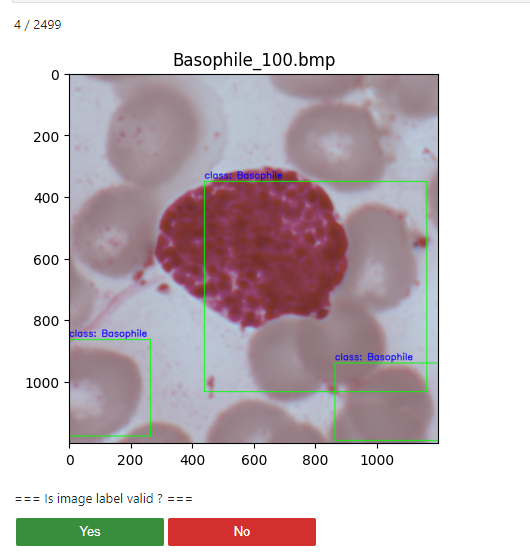

# Load accepted dataset3 labels

In [37]:
wbc_accepted = app.accepted_wbc

In [38]:
wbc_accepted

{'Basophile': ['Basophile_1000.bmp',
  'Basophile_1001.bmp',
  'Basophile_1002.bmp',
  'Basophile_1003.bmp',
  'Basophile_1004.bmp',
  'Basophile_1007.bmp',
  'Basophile_1008.bmp',
  'Basophile_1010.bmp',
  'Basophile_1011.bmp',
  'Basophile_1012.bmp',
  'Basophile_1013.bmp',
  'Basophile_1014.bmp',
  'Basophile_1017.bmp',
  'Basophile_1018.bmp',
  'Basophile_1019.bmp',
  'Basophile_1020.bmp',
  'Basophile_1021.bmp',
  'Basophile_1022.bmp',
  'Basophile_107.bmp',
  'Basophile_108.bmp',
  'Basophile_109.bmp',
  'Basophile_111.bmp',
  'Basophile_112.bmp',
  'Basophile_113.bmp',
  'Basophile_114.bmp',
  'Basophile_115.bmp',
  'Basophile_116.bmp',
  'Basophile_117.bmp',
  'Basophile_118.bmp',
  'Basophile_119.bmp',
  'Basophile_121.bmp',
  'Basophile_122.bmp',
  'Basophile_123.bmp',
  'Basophile_124.bmp',
  'Basophile_125.bmp',
  'Basophile_127.bmp',
  'Basophile_128.bmp',
  'Basophile_129.bmp',
  'Basophile_130.bmp',
  'Basophile_131.bmp',
  'Basophile_132.bmp',
  'Basophile_133.bmp',
  '

In [55]:
wbc_accepted_list = []
for _, v in wbc_accepted.items():
    for img_name in v:
        wbc_accepted_list.append((os.path.join(IMAGES_PATH, img_name), os.path.join(LABELS_PATH, os.path.splitext(img_name)[0] + ".txt")))

wbc_accepted_list[:5]

[('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_1000.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_1000.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_1001.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_1001.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_1002.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_1002.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_1003.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_1003.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_1004.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_1004.txt')]

# Create yolo dataset structure

In [46]:
DETECTION_AND_CLASSIFICATION_DATASET_PATH = r"D:\master_thesis_wd\datasets\detection_and_classification_dataset"

In [47]:
for main_dir in ["train", "val"]:
    for sub_dir in ["images", "labels"]:
        path = os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, main_dir, sub_dir)
        if not os.path.exists(path):
            os.makedirs(os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, main_dir, sub_dir))

In [48]:
print_tree(Path(DETECTION_AND_CLASSIFICATION_DATASET_PATH))

└──detection_and_classification_dataset
   ├──train
   │  ├──images
   │  └──labels
   └──val
      ├──images
      └──labels


### Split on train and val

In [57]:
import random
random.shuffle(wbc_accepted_list)
wbc_accepted_list[:5]

[('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Neutrophile Segment_1264.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Neutrophile Segment_1264.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Myeloblast_1128.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Myeloblast_1128.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_260.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_260.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Basophile_208.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Basophile_208.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset3\\images\\Myeloblast_1225.bmp',
  'D:\\master_thesis_wd\\datasets\\dataset3\\predicted_yolo_labels\\Myeloblast_1225.txt')]

In [59]:
wbc_accepted_list_len = len(wbc_accepted_list)
train_len = int(wbc_accepted_list_len * 0.8)

train = wbc_accepted_list[:train_len]
test = wbc_accepted_list[train_len:]

# Fill detection dataset

In [60]:
import shutil
for img, label in train:
    try:
        shutil.copy(label, os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, "train", "labels"))
        shutil.copy(img, os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, "train", "images"))
    except FileNotFoundError:
        continue

for img, label in test:
    try:
        shutil.copy(label, os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, "val", "labels"))
        shutil.copy(img, os.path.join(DETECTION_AND_CLASSIFICATION_DATASET_PATH, "val", "images"))
    except FileNotFoundError:
        continue